# Initial Stuff

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [47]:
# List of variables
df = pd.read_csv("PreFer_codebook.csv")
print(df.columns)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10411d1d0>>
Traceback (most recent call last):
  File "/Users/arnavkumar/opt/anaconda3/envs/eyra-rank/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


FileNotFoundError: [Errno 2] No such file or directory: 'PreFer_codebook.csv'

In [ ]:
print(len(df))

31667


In [ ]:
print(df['type_var'].unique())

['numeric' 'categorical' 'response to open-ended question' 'date or time'
 'character [almost exclusively empty strings]']


In [ ]:
print(df[df['type_var']== 'date or time']['var_label'].unique())

['Starting date of the questionnaire' 'Starting time of the questionnaire'
 'End date of the questionnaire' 'End time of the questionnaire'
 'What other reason do you mean?' 'Duration in seconds'
 ' Starting date of the questionnaire'
 ' Starting time of the questionnaire' ' End date of the questionnaire'
 ' End time of the questionnaire' 'Starting time questionnaire'
 'End time questionnaire' 'Starting date of the interview'
 'Starting date questionnaire' 'Starting time of the interview'
 'End date of the interview' 'End date questionnaire'
 'End time of the interview' 'Starting date questionnaire - part 1'
 'Starting time questionnaire - part 1' 'End date questionnaire - part 1'
 'End time questionnaire - part 1' 'Starting date questionnaire - part 2'
 'Starting time questionnaire - part 2' 'End date questionnaire - part 2'
 'End time questionnaire - part 2' 'Starting date questionnaire - part 3'
 'Starting time questionnaire - part 3' 'End date questionnaire - part 3'
 'End time que

In [ ]:
# Only keep numerical and categorical
df_new = df[(df['type_var'] == 'numeric') | (df['type_var'] == 'categorical')]
print(len(df_new))

30007


In [ ]:
df_new.head()

,var_name,var_label,values_cat,labels_cat,unique_values_n,n_missing,prop_missing,type_var,note,year,survey,dataset
0,nomem_encr,Number of household member encrypted,NaN,NaN,NaN,0,0.00000,numeric,NaN,NaN,All surveys,PreFer_train_data.csv
1,outcome_available,Whether the outcome is available for the respo...,NaN,NaN,2.0,7622,0.43106,numeric,NaN,NaN,Outcome,PreFer_train_data.csv
2,cf08a_m,Year and month of field work period,NaN,NaN,2.0,0,0.00000,numeric,NaN,2008.0,Family & Household,PreFer_train_data.csv
3,cf09b_m,Year and month of field work period,NaN,NaN,2.0,0,0.00000,numeric,NaN,2009.0,Family & Household,PreFer_train_data.csv
4,cf10c_m,Year and month of field work period,NaN,NaN,1.0,0,0.00000,numeric,NaN,2010.0,Family & Household,PreFer_train_data.csv


(array([5.324e+03, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([     0.,  68623., 137246., 205869., 274492., 343115., 411738.,
        480361., 548984., 617607., 686230.]),
 <BarContainer object of 10 artists>)

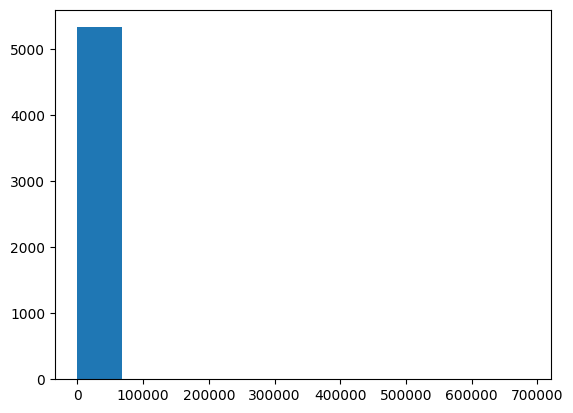

In [ ]:
# Missing values
hist = df['n_missing'].unique()
plt.hist(hist)

(array([2420.,  694.,  468.,  613.,  832.,  627.,  620.,  766., 1028.,
        4317.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

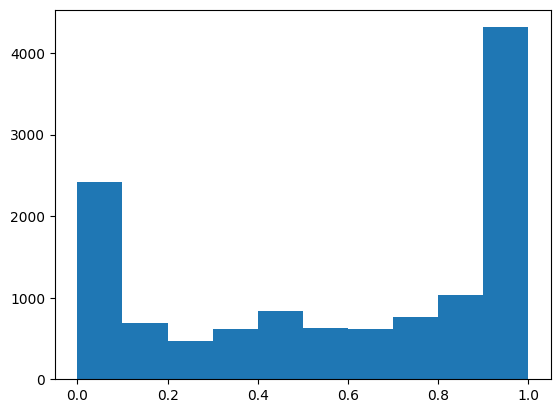

In [ ]:
hist = df_new['prop_missing'].unique()
plt.hist(hist)

In [ ]:
df_new[df_new['prop_missing'] >= 0.8]

,var_name,var_label,values_cat,labels_cat,unique_values_n,n_missing,prop_missing,type_var,note,year,survey,dataset
35,cf15h002,Year of birth of randomly selected child,NaN,NaN,14.0,4958,0.812654,numeric,NaN,2015.0,Family & Household,PreFer_train_data.csv
36,cf16i002,Year of birth of randomly selected child,NaN,NaN,14.0,4483,0.811109,numeric,NaN,2016.0,Family & Household,PreFer_train_data.csv
37,cf17j002,Year of birth of randomly selected child,NaN,NaN,14.0,5264,0.815871,numeric,NaN,2017.0,Family & Household,PreFer_train_data.csv
38,cf18k002,Year of birth of randomly selected child,NaN,NaN,14.0,4679,0.824348,numeric,NaN,2018.0,Family & Household,PreFer_train_data.csv
39,cf19l002,Year of birth of randomly selected child,NaN,NaN,14.0,4340,0.824311,numeric,NaN,2019.0,Family & Household,PreFer_train_data.csv
...,...,...,...,...,...,...,...,...,...,...,...,...
31452,brutoink_f_2007,"Personal gross monthly income in Euros, imputed",NaN,NaN,0.0,27888,1.000000,numeric,NaN,2007.0,Summary Background Variables,PreFer_train_data.csv
31480,netinc_2007,Personal net monthly income in Euros,-15; -14; -13,Unknown (missing); Prefer not to say; I dont know,0.0,27888,1.000000,categorical,NaN,2007.0,Summary Background Variables,PreFer_train_data.csv
31494,nettohh_f_2007,Net household income in Euros,NaN,NaN,0.0,27888,1.000000,numeric,NaN,2007.0,Summary Background Variables,PreFer_train_data.csv
31522,nettoink_f_2007,"Personal net monthly income in Euros, imputed",NaN,NaN,0.0,27888,1.000000,numeric,NaN,2007.0,Summary Background Variables,PreFer_train_data.csv


In [ ]:
df_nomissing = df_new[df_new['prop_missing'] < 0.4]
print(len(df_nomissing))

13216


In [ ]:
print(df_nomissing['survey'].unique())

['All surveys' 'Family & Household' 'Economic Situation Assets'
 'Economic Situation Housing' 'Economic Situation Income' 'Health'
 'Personality' 'Politics and Values' 'Religion and Ethnicity'
 'Social Integration and Leisure' 'Work & Schooling'
 'Summary Background Variables' 'Background Variables']


In [ ]:
df_family = df_nomissing[df_nomissing['survey']=='Family & Household']
print(len(df_family))

# Get list of variables
list_of_family = df_family['var_name'].values
print(list_of_family)

593
['cf08a_m' 'cf09b_m' 'cf10c_m' 'cf11d_m' 'cf12e_m' 'cf13f_m' 'cf14g_m'
 'cf15h_m' 'cf16i_m' 'cf17j_m' 'cf18k_m' 'cf19l_m' 'cf20m_m' 'cf08a001'
 'cf09b001' 'cf10c001' 'cf11d001' 'cf12e001' 'cf13f001' 'cf14g001'
 'cf15h001' 'cf16i001' 'cf17j001' 'cf18k001' 'cf19l001' 'cf20m001'
 'cf08a003' 'cf09b003' 'cf10c003' 'cf11d003' 'cf12e003' 'cf13f003'
 'cf14g003' 'cf15h003' 'cf16i003' 'cf17j003' 'cf18k003' 'cf19l003'
 'cf20m003' 'cf08a004' 'cf09b004' 'cf10c004' 'cf11d004' 'cf12e004'
 'cf13f004' 'cf14g004' 'cf15h004' 'cf16i004' 'cf17j004' 'cf18k004'
 'cf19l004' 'cf20m004' 'cf08a005' 'cf08a007' 'cf08a009' 'cf09b009'
 'cf10c009' 'cf12e009' 'cf14g009' 'cf17j009' 'cf08a011' 'cf09b011'
 'cf10c011' 'cf12e011' 'cf14g011' 'cf17j011' 'cf20m011' 'cf08a013'
 'cf08a022' 'cf09b022' 'cf08a024' 'cf09b024' 'cf10c024' 'cf11d024'
 'cf12e024' 'cf13f024' 'cf14g024' 'cf15h024' 'cf16i024' 'cf17j024'
 'cf18k024' 'cf19l024' 'cf20m024' 'cf08a025' 'cf09b025' 'cf10c025'
 'cf11d025' 'cf12e025' 'cf13f025' 'cf14g025' 'cf1

In [ ]:
df_train = pd.read_csv("PreFer_train_data.csv")

<ipython-input-20-661090f7a33e>:1: DtypeWarning: Columns (2583,2584,2585,2586,2587,2588,2589,4358,4359,4360,4361,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371,4372,4373,4374,4375,4379,4380,4381,4382,4383,4384,4385,4386,4387,4388,4389,4390,4391,4392,4393,4394,4395,4396,4397,4398,4399,4400,4401,4405,4406,4407,4408,4409,5215,5216,5219,5220,5613,5614,5615,5616,5617,5618,5619,5620,5621,5622,5624,5625,5626,5627,5628,5629,5630,5631,5632,5633,5634,5635,5636,5638,5639,5640,5787,5788,5789,5790,5791,5792,5793,5794,5795,5796,6393,6394,6395,6396,6397,6398,6399,6400,6401,6402,6403,6619,6620,6621,6622,6623,6624,6625,6626,6627,6628,6629,6630,6631,6632,6633,6634,6635,6638,6640,6641,6642,6643,6644,6645,6646,6647,6648,6649,6650,6651,6652,6653,6654,6655,6656,6657,6658,6659,6660,6661,6664,6666,6667,6668,6669,6670,6965,6966,6967,6968,6969,6970,6971,6972,6973,6974,6975,7064,7065,7066,7067,7068,7069,7070,7071,7072,7073,7074,7163,7164,7165,7166,7167,7168,7169,7170,7171,7172,7408,7409,7410,7411,7412,7413,74

In [ ]:
df_family_train = df_train[list_of_family]
df_family_train.head()

,cf08a_m,cf09b_m,cf10c_m,cf11d_m,cf12e_m,cf13f_m,cf14g_m,cf15h_m,cf16i_m,cf17j_m,...,cf20m520,cf15h521,cf16i521,cf17j521,cf18k521,cf19l521,cf20m521,cf19l522,cf19l524,cf20m526
0,200803.0,200904.0,NaN,NaN,201203.0,201303.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200803.0,200903.0,201003.0,201103.0,201203.0,201303.0,201403.0,201509.0,201609.0,201709.0,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,200803.0,200903.0,201003.0,201103.0,201203.0,NaN,201403.0,201509.0,201609.0,201709.0,...,5.0,1.0,1.0,1.0,NaN,1.0,7.0,1.0,1.0,4.0
3,200803.0,200903.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200803.0,200903.0,201003.0,201103.0,201203.0,201303.0,201403.0,201509.0,201609.0,201709.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0


In [ ]:
df_family_train = df_family_train.fillna(df_family_train.mean())

In [ ]:
# Assuming df is your DataFrame with 1582 variables
# Replace 'df' with the name of your DataFrame if it's different

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_family_train)

# Initialize PCA with 100 components
pca = PCA(n_components=1000)

# Fit PCA to the scaled data
pca.fit(scaled_data)

# Transform the data to the lower-dimensional space
reduced_data = pca.transform(scaled_data)

# Convert the reduced data to a DataFrame
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i}' for i in range(1, 1001)])

# Print the shape of the reduced DataFrame
print("Shape of reduced DataFrame:", reduced_df.shape)

ValueError: n_components=1000 must be between 0 and min(n_samples, n_features)=593 with svd_solver='full'

In [ ]:
# Calculate the explained variance ratio of the principal components
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

# Calculate the total variance explained by the principal components
total_variance_explained = explained_variance_ratio.sum()
print(total_variance_explained)

## Uh

In [ ]:
import pandas as pd

df_train = pd.read_csv("PreFer_train_data.csv")

<ipython-input-3-d97ebaf30621>:3: DtypeWarning: Columns (2583,2584,2585,2586,2587,2588,2589,4358,4359,4360,4361,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371,4372,4373,4374,4375,4379,4380,4381,4382,4383,4384,4385,4386,4387,4388,4389,4390,4391,4392,4393,4394,4395,4396,4397,4398,4399,4400,4401,4405,4406,4407,4408,4409,5215,5216,5219,5220,5613,5614,5615,5616,5617,5618,5619,5620,5621,5622,5624,5625,5626,5627,5628,5629,5630,5631,5632,5633,5634,5635,5636,5638,5639,5640,5787,5788,5789,5790,5791,5792,5793,5794,5795,5796,6393,6394,6395,6396,6397,6398,6399,6400,6401,6402,6403,6619,6620,6621,6622,6623,6624,6625,6626,6627,6628,6629,6630,6631,6632,6633,6634,6635,6638,6640,6641,6642,6643,6644,6645,6646,6647,6648,6649,6650,6651,6652,6653,6654,6655,6656,6657,6658,6659,6660,6661,6664,6666,6667,6668,6669,6670,6965,6966,6967,6968,6969,6970,6971,6972,6973,6974,6975,7064,7065,7066,7067,7068,7069,7070,7071,7072,7073,7074,7163,7164,7165,7166,7167,7168,7169,7170,7171,7172,7408,7409,7410,7411,7412,7413,741

In [ ]:
df_train.columns

Index(['nomem_encr', 'outcome_available', 'cf08a_m', 'cf09b_m', 'cf10c_m',
       'cf11d_m', 'cf12e_m', 'cf13f_m', 'cf14g_m', 'cf15h_m',
       ...
       'woonvorm_2011', 'woonvorm_2012', 'woonvorm_2013', 'woonvorm_2014',
       'woonvorm_2015', 'woonvorm_2016', 'woonvorm_2017', 'woonvorm_2018',
       'woonvorm_2019', 'woonvorm_2020'],
      dtype='object', length=31634)

In [ ]:
df_supervised = df_train[df_train['outcome_available']==1]
nan_counts = df_supervised.isna().sum()
print(len(df_supervised))
print(nan_counts)

987
nomem_encr             0
outcome_available      0
cf08a_m              803
cf09b_m              792
cf10c_m              756
                    ... 
woonvorm_2016        372
woonvorm_2017        217
woonvorm_2018        208
woonvorm_2019        148
woonvorm_2020          4
Length: 31634, dtype: int64


In [ ]:
threshold = len(df_supervised) * 0.65
df_supervised_filtered = df_supervised.dropna(thresh=threshold, axis=1)
print(len(df_supervised_filtered.columns))

2770


In [ ]:
columns_list = df_supervised_filtered.columns.tolist()
print(columns_list)

['nomem_encr', 'outcome_available', 'cf17j_m', 'cf18k_m', 'cf19l_m', 'cf20m_m', 'cf17j001', 'cf18k001', 'cf19l001', 'cf20m001', 'cf17j003', 'cf18k003', 'cf19l003', 'cf20m003', 'cf17j004', 'cf18k004', 'cf19l004', 'cf20m004', 'cf20m005', 'cf20m007', 'cf18k009', 'cf19l009', 'cf20m009', 'cf17j011', 'cf18k011', 'cf19l011', 'cf20m011', 'cf20m020', 'cf18k022', 'cf19l022', 'cf20m022', 'cf17j024', 'cf18k024', 'cf19l024', 'cf20m024', 'cf20m025', 'cf20m030', 'cf20m032', 'cf20m128', 'cf20m131', 'cf18k132', 'cf19l132', 'cf20m132', 'cf20m135', 'cf18k136', 'cf19l136', 'cf20m136', 'cf20m137', 'cf18k138', 'cf19l138', 'cf20m138', 'cf20m139', 'cf20m143', 'cf18k144', 'cf19l144', 'cf20m144', 'cf20m145', 'cf18k146', 'cf19l146', 'cf20m146', 'cf20m147', 'cf18k148', 'cf19l148', 'cf20m148', 'cf20m149', 'cf18k150', 'cf19l150', 'cf20m150', 'cf20m151', 'cf18k152', 'cf19l152', 'cf20m152', 'cf20m153', 'cf20m157', 'cf18k158', 'cf19l158', 'cf20m158', 'cf20m159', 'cf18k160', 'cf19l160', 'cf20m160', 'cf18k161', 'cf19l16

In [ ]:
numeric_columns = df_supervised_filtered.select_dtypes(include='number').columns
df_supervised_numeric = df_supervised_filtered[numeric_columns]
print("Number of numeric columns:", len(df_supervised_numeric.columns))

Number of numeric columns: 2636


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_supervised_imputed = pd.DataFrame(imputer.fit_transform(df_supervised_numeric), columns=df_supervised_numeric.columns)
print("Number of NaN values after imputation:")
print(df_supervised_imputed.isna().sum())

Number of NaN values after imputation:
nomem_encr           0
outcome_available    0
cf17j_m              0
cf18k_m              0
cf19l_m              0
                    ..
woning_2020          0
woonvorm_2017        0
woonvorm_2018        0
woonvorm_2019        0
woonvorm_2020        0
Length: 2636, dtype: int64


In [ ]:
outcome = pd.read_csv("PreFer_train_outcome.csv")
outcome_supervised = outcome.dropna()['new_child']

775 212


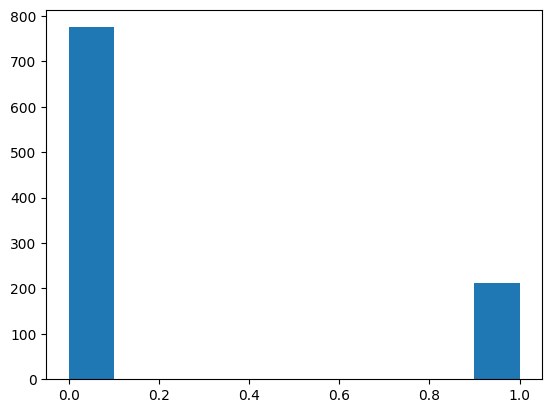

In [ ]:
import matplotlib.pyplot as plt
plt.hist(outcome_supervised)
print(sum(outcome_supervised < 0.5), sum(outcome_supervised > 0.5))

In [ ]:
1 / (212/(775+212))

4.65566037735849

In [ ]:
print(outcome_supervised)

4       0.0
8       1.0
18      0.0
19      0.0
35      0.0
       ... 
5975    1.0
5981    0.0
5984    1.0
6105    0.0
6216    1.0
Name: new_child, Length: 987, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = df_supervised_imputed
y = outcome_supervised
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7373737373737373

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        73
         1.0       0.00      0.00      0.00        26

    accuracy                           0.74        99
   macro avg       0.37      0.50      0.42        99
weighted avg       0.54      0.74      0.63        99



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = SimpleNN(input_size)
criterion = nn.CrossEntropyLoss(weight=torch.tensor([1, 4.65566]))
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

num_epochs = 50
for epoch in range(num_epochs):
  for inputs, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

with torch.no_grad():
  model.eval()
  outputs = model(X_test_tensor)
  _, predicted = torch.max(outputs, 1)
  acc = accuracy_score(y_test_tensor, predicted)
  report = classification_report(y_test_tensor, predicted)

print("Accuracy:", acc)
print("\nClassification Report:\n", report)


Accuracy: 0.6565656565656566

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.78        73
           1       0.21      0.12      0.15        26

    accuracy                           0.66        99
   macro avg       0.47      0.48      0.47        99
weighted avg       0.59      0.66      0.62        99



I'm pretty sure LR is just outputing 0's and the DL is just not that good really so maybe we need to use supplementary data

# Setup for Below

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
# from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
df_train = pd.read_csv("training_data/PreFer_train_data.csv")
df_supplementary = pd.read_csv("other_data/PreFer_train_supplementary_data.csv")
df_train_total = pd.concat([df_train, df_supplementary], ignore_index=True)

/var/folders/2s/7lws4hcj38g_153307sxm35h0000gn/T/ipykernel_29201/3888584923.py:1: DtypeWarning: Columns (2583,2584,2585,2586,2587,2588,2589,4358,4359,4360,4361,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371,4372,4373,4374,4375,4379,4380,4381,4382,4383,4384,4385,4386,4387,4388,4389,4390,4391,4392,4393,4394,4395,4396,4397,4398,4399,4400,4401,4405,4406,4407,4408,4409,5215,5216,5219,5220,5613,5614,5615,5616,5617,5618,5619,5620,5621,5622,5624,5625,5626,5627,5628,5629,5630,5631,5632,5633,5634,5635,5636,5638,5639,5640,5787,5788,5789,5790,5791,5792,5793,5794,5795,5796,6393,6394,6395,6396,6397,6398,6399,6400,6401,6402,6403,6619,6620,6621,6622,6623,6624,6625,6626,6627,6628,6629,6630,6631,6632,6633,6634,6635,6638,6640,6641,6642,6643,6644,6645,6646,6647,6648,6649,6650,6651,6652,6653,6654,6655,6656,6657,6658,6659,6660,6661,6664,6666,6667,6668,6669,6670,6965,6966,6967,6968,6969,6970,6971,6972,6973,6974,6975,7064,7065,7066,7067,7068,7069,7070,7071,7072,7073,7074,7163,7164,7165,7166,7167,7168,7169,

In [ ]:
outcome = pd.read_csv("training_data/PreFer_train_outcome.csv")
outcome_supplementary = pd.read_csv("other_data/PreFer_train_supplementary_outcome.csv")
outcome_total = pd.concat([outcome, outcome_supplementary], ignore_index=True)

In [ ]:
# Get test set of only outcomes that are in train set and are available
df_supervised = df_train[df_train['outcome_available']==1]
outcome_supervised = outcome.dropna()['new_child']

X = df_supervised
y = outcome_supervised
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We should use X_test, y_test to test all things from now on

# Just using clustering

Actually, how would this work when we try to submit the model, cuz like what is the model

# RandomForest with/without Supplementary Data

## Without supplementary data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_train_rf = X_train[X_train['outcome_available']==1]
threshold = len(df_train_rf) * 0.75
df_train_rf = df_train_rf.dropna(thresh=threshold, axis=1)
numeric_columns = df_train_rf.select_dtypes(include='number').columns
df_train_rf = df_train_rf[numeric_columns]
print("Number of remaining columns:", len(df_train_rf.columns))

Number of remaining columns: 879


In [ ]:
# Update test data to have same columns
columns_list = df_train_rf.columns.tolist()
print(columns_list)
df_test_rf = X_test[columns_list]

['nomem_encr', 'outcome_available', 'cf20m_m', 'cf20m001', 'cf20m003', 'cf20m004', 'cf20m005', 'cf20m007', 'cf20m009', 'cf20m011', 'cf20m020', 'cf20m022', 'cf20m024', 'cf20m128', 'cf20m137', 'cf20m151', 'cf20m161', 'cf20m162', 'cf20m388', 'cf20m389', 'cf20m390', 'cf20m391', 'cf20m392', 'cf20m397', 'cf20m453', 'cf20m454', 'cf20m471', 'cf20m504', 'cf20m505', 'cf20m506', 'cf20m507', 'cf20m508', 'cf20m509', 'cf20m510', 'cf20m511', 'cf20m512', 'cf20m526', 'ca20g_m', 'ca20g001', 'ca20g002', 'ca20g003', 'ca20g005', 'ca20g006', 'ca20g007', 'ca20g008', 'ca20g009', 'ca20g010', 'ca20g011', 'ca20g012', 'ca20g057', 'ca20g058', 'ca20g060', 'ca20g061', 'ca20g062', 'ca20g066', 'ca20g067', 'ca20g068', 'ca20g069', 'ca20g070', 'ca20g075', 'ca20g078', 'ca20g079', 'ca20g080', 'ca20g081', 'ca20g082', 'ca20g087', 'ci20m_m', 'ci20m001', 'ci20m002', 'ci20m003', 'ci20m005', 'ci20m006', 'ci20m007', 'ci20m008', 'ci20m037', 'ci20m038', 'ci20m039', 'ci20m040', 'ci20m041', 'ci20m042', 'ci20m043', 'ci20m044', 'ci20m0

In [ ]:
# Impute remaining columns
imputer = SimpleImputer(strategy='mean')
df_train_rf = pd.DataFrame(imputer.fit_transform(df_train_rf), columns=df_train_rf.columns)
df_test_rf = pd.DataFrame(imputer.fit_transform(df_test_rf), columns=df_test_rf.columns)

In [ ]:
print(df_train_rf.shape)
print(y_train.shape)
print(df_test_rf.shape)
print(y_test.shape)

(789, 879)
(789,)
(198, 879)
(198,)


In [ ]:
# Create RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(df_train_rf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate RF
y_pred_rf = rf_classifier.predict(df_test_rf)

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.7828282828282829

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.99      0.87       148
         1.0       0.89      0.16      0.27        50

    accuracy                           0.78       198
   macro avg       0.83      0.58      0.57       198
weighted avg       0.81      0.78      0.72       198


Confusion Matrix:
 [[147   1]
 [ 42   8]]


## With Supplementary Data

In [ ]:
df_supp_supervised = df_supplementary[df_supplementary['outcome_available']==1]
X_train_total = pd.concat([X_train, df_supp_supervised], ignore_index=True)

In [ ]:
df_y_supp_supervised = outcome_supplementary.dropna()['new_child']
y_train_rf = pd.concat([y_train, df_y_supp_supervised], ignore_index=True)

In [ ]:
df_train_rf = X_train_total[X_train_total['outcome_available']==1]
threshold = len(df_train_rf) * 0.75
df_train_rf = df_train_rf.dropna(thresh=threshold, axis=1)
numeric_columns = df_train_rf.select_dtypes(include='number').columns
df_train_rf = df_train_rf[numeric_columns]
print("Number of remaining columns:", len(df_train_rf.columns))

Number of remaining columns: 3031


In [ ]:
# Update test data to have same columns
columns_list = df_train_rf.columns.tolist()
print(columns_list)
df_test_rf = X_test[columns_list]

['nomem_encr', 'outcome_available', 'cf17j_m', 'cf18k_m', 'cf19l_m', 'cf20m_m', 'cf17j001', 'cf18k001', 'cf19l001', 'cf20m001', 'cf17j003', 'cf18k003', 'cf19l003', 'cf20m003', 'cf17j004', 'cf18k004', 'cf19l004', 'cf20m004', 'cf17j024', 'cf18k024', 'cf19l024', 'cf20m024', 'cf17j388', 'cf18k388', 'cf19l388', 'cf20m388', 'cf17j389', 'cf18k389', 'cf19l389', 'cf20m389', 'cf17j390', 'cf18k390', 'cf19l390', 'cf20m390', 'cf17j391', 'cf18k391', 'cf19l391', 'cf20m391', 'cf17j392', 'cf18k392', 'cf19l392', 'cf20m392', 'cf17j397', 'cf18k397', 'cf19l397', 'cf20m397', 'cf17j432', 'cf18k432', 'cf19l432', 'cf17j454', 'cf18k454', 'cf19l454', 'cf20m454', 'cf17j471', 'cf18k471', 'cf19l471', 'cf20m471', 'cf19l522', 'cf19l524', 'cf20m526', 'ca18f_m', 'ca20g_m', 'ca20g001', 'ca20g002', 'ca20g003', 'ca18f005', 'ca20g005', 'ca18f006', 'ca20g006', 'ca18f007', 'ca20g007', 'ca18f008', 'ca20g008', 'ca18f009', 'ca20g009', 'ca18f010', 'ca20g010', 'ca18f011', 'ca20g011', 'ca20g012', 'ca18f057', 'ca20g057', 'ca18f058'

In [ ]:
# Impute remaining columns
imputer = SimpleImputer(strategy='mean')
df_train_rf = pd.DataFrame(imputer.fit_transform(df_train_rf), columns=df_train_rf.columns)
df_test_rf = pd.DataFrame(imputer.fit_transform(df_test_rf), columns=df_test_rf.columns)

In [ ]:
print(df_train_rf.shape)
print(y_train_rf.shape)
print(df_test_rf.shape)
print(y_test.shape)

(3595, 5317)
(3595,)
(198, 5317)
(198,)


In [ ]:
# Create RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(df_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate RF
y_pred_rf = rf_classifier.predict(df_test_rf)

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.7525252525252525

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86       148
         1.0       1.00      0.02      0.04        50

    accuracy                           0.75       198
   macro avg       0.88      0.51      0.45       198
weighted avg       0.81      0.75      0.65       198


Confusion Matrix:
 [[148   0]
 [ 49   1]]


# Deep learning with/without Supplementary Data

## Without Supplementary Data

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
class SimpleNN(nn.Module):
  def __init__(self, input_size):
    super(SimpleNN, self).__init__()
    self.fc1 = nn.Linear(input_size, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 2)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
df_train_nn = X_train[X_train['outcome_available']==1]
threshold = len(df_train_nn) * 0.75
df_train_nn = df_train_nn.dropna(thresh=threshold, axis=1)
numeric_columns = df_train_nn.select_dtypes(include='number').columns
df_train_nn = df_train_nn[numeric_columns]
print("Number of remaining columns:", len(df_train_nn.columns))

Number of remaining columns: 879


In [ ]:
# Update test data to have same columns
columns_list = df_train_nn.columns.tolist()
print(columns_list)
df_test_nn = X_test[columns_list]

['nomem_encr', 'outcome_available', 'cf20m_m', 'cf20m001', 'cf20m003', 'cf20m004', 'cf20m005', 'cf20m007', 'cf20m009', 'cf20m011', 'cf20m020', 'cf20m022', 'cf20m024', 'cf20m128', 'cf20m137', 'cf20m151', 'cf20m161', 'cf20m162', 'cf20m388', 'cf20m389', 'cf20m390', 'cf20m391', 'cf20m392', 'cf20m397', 'cf20m453', 'cf20m454', 'cf20m471', 'cf20m504', 'cf20m505', 'cf20m506', 'cf20m507', 'cf20m508', 'cf20m509', 'cf20m510', 'cf20m511', 'cf20m512', 'cf20m526', 'ca20g_m', 'ca20g001', 'ca20g002', 'ca20g003', 'ca20g005', 'ca20g006', 'ca20g007', 'ca20g008', 'ca20g009', 'ca20g010', 'ca20g011', 'ca20g012', 'ca20g057', 'ca20g058', 'ca20g060', 'ca20g061', 'ca20g062', 'ca20g066', 'ca20g067', 'ca20g068', 'ca20g069', 'ca20g070', 'ca20g075', 'ca20g078', 'ca20g079', 'ca20g080', 'ca20g081', 'ca20g082', 'ca20g087', 'ci20m_m', 'ci20m001', 'ci20m002', 'ci20m003', 'ci20m005', 'ci20m006', 'ci20m007', 'ci20m008', 'ci20m037', 'ci20m038', 'ci20m039', 'ci20m040', 'ci20m041', 'ci20m042', 'ci20m043', 'ci20m044', 'ci20m0

In [ ]:
# Impute remaining columns
imputer = SimpleImputer(strategy='mean')
df_train_nn = pd.DataFrame(imputer.fit_transform(df_train_nn), columns=df_train_nn.columns)
df_test_nn = pd.DataFrame(imputer.fit_transform(df_test_nn), columns=df_test_nn.columns)

In [ ]:
print(df_train_nn.shape)
print(y_train.shape)
print(df_test_nn.shape)
print(y_test.shape)

(789, 879)
(789,)
(198, 879)
(198,)


In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(df_train_nn.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(df_test_nn.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_tensor)
X_test_scaled = scaler.transform(X_test_tensor)

In [ ]:
# Initialize the model, loss function, and optimizer
input_size = X_train_tensor.shape[1]
model = SimpleNN(input_size)
criterion = nn.CrossEntropyLoss(weight=torch.tensor([1, 4.65566]))
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
num_epochs = 250
for epoch in range(num_epochs):
  for inputs, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

with torch.no_grad():
  model.eval()
  outputs = model(X_test_tensor)
  _, y_pred_nn = torch.max(outputs, 1)
  acc = accuracy_score(y_test_tensor, predicted)
  report = classification_report(y_test_tensor, y_pred_nn)
  conf_matrix = confusion_matrix(y_test, y_pred_nn)


print("Accuracy:", acc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.4393939393939394

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.03      0.06       148
           1       0.25      0.96      0.40        50

    accuracy                           0.27       198
   macro avg       0.48      0.50      0.23       198
weighted avg       0.60      0.27      0.15       198


Confusion Matrix:
 [[  5 143]
 [  2  48]]


## With Supplementary Data

In [ ]:
df_supp_supervised = df_supplementary[df_supplementary['outcome_available']==1]
X_train_total = pd.concat([X_train, df_supp_supervised], ignore_index=True)

In [ ]:
df_y_supp_supervised = outcome_supplementary.dropna()['new_child']
y_train_nn = pd.concat([y_train, df_y_supp_supervised], ignore_index=True)

In [ ]:
df_train_nn = X_train_total[X_train_total['outcome_available']==1]
threshold = len(df_train_nn) * 0.75
df_train_nn = df_train_nn.dropna(thresh=threshold, axis=1)
numeric_columns = df_train_nn.select_dtypes(include='number').columns
df_train_nn = df_train_nn[numeric_columns]
print("Number of remaining columns:", len(df_train_nn.columns))

Number of remaining columns: 3031


In [ ]:
# Get all rows that are not in test set
train_nomem_encr_set = set(df_train_total['nomem_encr'])
test_nomem_encr_set = set(X_test['nomem_encr'])
unique_in_train_not_in_test = train_nomem_encr_set - test_nomem_encr_set
df_train_cluster = df_train_total[df_train_total['nomem_encr'].isin(unique_in_train_not_in_test)]
outcome_cluster = outcome_total[outcome_total['nomem_encr'].isin(unique_in_train_not_in_test)]

In [ ]:
# Update test data to have same columns
columns_list = df_train_nn.columns.tolist()
print(columns_list)
df_test_nn = X_test[columns_list]

['nomem_encr', 'outcome_available', 'cf17j_m', 'cf18k_m', 'cf19l_m', 'cf20m_m', 'cf17j001', 'cf18k001', 'cf19l001', 'cf20m001', 'cf17j003', 'cf18k003', 'cf19l003', 'cf20m003', 'cf17j004', 'cf18k004', 'cf19l004', 'cf20m004', 'cf17j024', 'cf18k024', 'cf19l024', 'cf20m024', 'cf17j388', 'cf18k388', 'cf19l388', 'cf20m388', 'cf17j389', 'cf18k389', 'cf19l389', 'cf20m389', 'cf17j390', 'cf18k390', 'cf19l390', 'cf20m390', 'cf17j391', 'cf18k391', 'cf19l391', 'cf20m391', 'cf17j392', 'cf18k392', 'cf19l392', 'cf20m392', 'cf17j397', 'cf18k397', 'cf19l397', 'cf20m397', 'cf17j432', 'cf18k432', 'cf19l432', 'cf17j454', 'cf18k454', 'cf19l454', 'cf20m454', 'cf17j471', 'cf18k471', 'cf19l471', 'cf20m471', 'cf19l522', 'cf19l524', 'cf20m526', 'ca18f_m', 'ca20g_m', 'ca20g001', 'ca20g002', 'ca20g003', 'ca18f005', 'ca20g005', 'ca18f006', 'ca20g006', 'ca18f007', 'ca20g007', 'ca18f008', 'ca20g008', 'ca18f009', 'ca20g009', 'ca18f010', 'ca20g010', 'ca18f011', 'ca20g011', 'ca20g012', 'ca18f057', 'ca20g057', 'ca18f058'

In [ ]:
# Impute remaining columns
imputer = SimpleImputer(strategy='mean')
df_train_nn = pd.DataFrame(imputer.fit_transform(df_train_nn), columns=df_train_rf.columns)
df_test_nn = pd.DataFrame(imputer.fit_transform(df_test_nn), columns=df_test_nn.columns)

In [ ]:
print(df_train_nn.shape)
print(y_train_nn.shape)
print(df_test_nn.shape)
print(y_test.shape)

(3595, 3031)
(3595,)
(198, 3031)
(198,)


In [ ]:
class SimpleNN(nn.Module):
  def __init__(self, input_size):
    super(SimpleNN, self).__init__()
    self.fc1 = nn.Linear(input_size, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 2)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(df_train_nn.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_nn.values, dtype=torch.long)
X_test_tensor = torch.tensor(df_test_nn.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_tensor)
X_test_scaled = scaler.transform(X_test_tensor)

In [55]:
# Initialize the model, loss function, and optimizer
input_size = X_train_tensor.shape[1]
model = SimpleNN(input_size)
criterion = nn.CrossEntropyLoss(weight=torch.tensor([1.0, 20.0]))
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [56]:
num_epochs = 250
for epoch in range(num_epochs):
  for inputs, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

with torch.no_grad():
  model.eval()
  outputs = model(X_test_tensor)
  _, y_pred_nn = torch.max(outputs, 1)
  acc = accuracy_score(y_test_tensor, predicted)
  report = classification_report(y_test_tensor, y_pred_nn)
  conf_matrix = confusion_matrix(y_test, y_pred_nn)


print("Accuracy:", acc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.4393939393939394

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       148
           1       0.00      0.00      0.00        50

    accuracy                           0.75       198
   macro avg       0.37      0.50      0.43       198
weighted avg       0.56      0.75      0.64       198


Confusion Matrix:
 [[148   0]
 [ 50   0]]


/Users/arnavkumar/opt/anaconda3/envs/eyra-rank/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/arnavkumar/opt/anaconda3/envs/eyra-rank/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/arnavkumar/opt/anaconda3/envs/eyra-rank/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

# Semi-supervised learning with/without Supplementary Data with RF or DL

In [61]:
from sklearn.cluster import KMeans

In [72]:
# Get all rows that are not in test set
train_nomem_encr_set = set(df_train_total['nomem_encr'])
test_nomem_encr_set = set(X_test['nomem_encr'])
unique_in_train_not_in_test = train_nomem_encr_set - test_nomem_encr_set
df_train_cluster = df_train_total[df_train_total['nomem_encr'].isin(unique_in_train_not_in_test)]
outcome_cluster = outcome_total[outcome_total['nomem_encr'].isin(unique_in_train_not_in_test)]

In [73]:
threshold = len(df_train_cluster) * 0.5
df_train_cluster = df_train_cluster.dropna(thresh=threshold, axis=1)
numeric_columns = df_train_cluster.select_dtypes(include='number').columns
df_train_cluster = df_train_cluster[numeric_columns]
print("Number of remaining columns:", len(df_train_cluster.columns))

(16864, 81)
Number of remaining columns: 81


In [76]:
# Impute remaining columns
imputer = SimpleImputer(strategy='mean')
df_train_cluster = pd.DataFrame(imputer.fit_transform(df_train_cluster), columns=df_train_cluster.columns)


In [78]:
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit KMeans model to the data
# If you have selected features, replace df_train_cluster with features
kmeans.fit(df_train_cluster)

# Get cluster labels
cluster_labels = kmeans.labels_